<a href="https://colab.research.google.com/github/hhshawks75/MachineLearning/blob/master/DecisionTree%2CBagging%2CRandomForestandBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 5 - INTRO TO MACHINE LEARNING | Decision Tree, Bagging, Random Forest and Boosting


> **FULL MARKS = 60**





1.2. Leave-One-Out Cross Validation(LOOCV) | SCORE : 


**Note:** To submit the assignment, please follow the same steps as in assignments 1-4.

In this assignment we will use things we have learned from previous exercises. You will not be given instructions on how to load data, plot data, standardize/normalize data, how to write functions and many more. You will be given instructions on what you will be doing. **SO PLEASE START THIS ASSIGNMENT AS EARLY AS POSSIBLE**

1. **Decision Tree with kfold cv| SCORE : 25**
> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
  
  **1.1 Regression**
      
    References
    > https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

  **1.2 Classification**
      
    References
    > https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


2. **Decision Tree with bagging | SCORE : 25**
  
  **2.1 Regression**
      
    References
    > https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor

  **2.2 Classification**
      
    References
    > https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier

3. **Random Forest | SCORE : 25**
  
  **3.1 Regression**
      
    References
    > https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

  **3.2 Classification**
      
    References
    > https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

4. **Boosting | SCORE : 25**
  
  **4.1 Regression**
      
    References
    > https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

  **4.2 Classification**
      
    References
    > https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier


In [ ]:
# Required Dataset
# For classification
from sklearn.datasets import load_breast_cancer
# For regression
from sklearn.datasets import load_diabetes

# In the following exercises you will use the 
# breast_cancer, and diabetes datasets for classification and regression problems respectively.
# Use your experience from previous exercises on how to use sklearn model, load data and do visualization
# You will not be given points for preparing the dataset
# So We are going to do this for you
# You are welcome to load data set way you want
# Please try to research about following the datasets, load_breast_cancer, load_diabetes data set

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

regx, regy = load_diabetes(return_X_y=True)
regX = preprocessing.scale(regx)
regXtrain, regXtest, regYtrain, regYtest = train_test_split(regX, regy, test_size = 0.2)


print(f"Regression data : diabetes data")
print(f"xtrainShape : {regXtrain.shape}, ytrainShape : {regYtrain.shape}, xtestShape : {regXtest.shape}, ytestShape : {regYtest.shape}")

clsx, clsy = load_breast_cancer(return_X_y=True)
clsX = preprocessing.scale(clsx)
clsXtrain, clsXtest, clsYtrain, clsYtest = train_test_split(clsX, clsy, test_size = 0.2)
print(f"Classification data : breast cancer data")
print(f"xtrainShape : {clsXtrain.shape}, ytrainShape : {clsYtrain.shape}, xtestShape : {clsXtest.shape}, ytestShape : {clsYtest.shape}, NumClasses = {np.unique(clsy)}")


Regression data : diabetes data
xtrainShape : (353, 10), ytrainShape : (353,), xtestShape : (89, 10), ytestShape : (89,)
Classification data : breast cancer data
xtrainShape : (455, 30), ytrainShape : (455,), xtestShape : (114, 30), ytestShape : (114,), NumClasses = [0 1]


### 1. Decision Tree with kfold cv
---



---



***EXERCISE NO. 1***

  > **Task-1 : Regression | Score :12.5** 

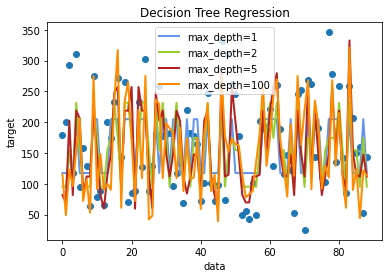

0.14726938288770874
0.3008826921781642
0.22587661547551907
0.0616658523466036
[ 0.40603809  0.65117404  0.45786291 -0.05607123 -0.13438009  0.7455385
  0.29075826  0.04328622 -0.41863122 -1.01892651]


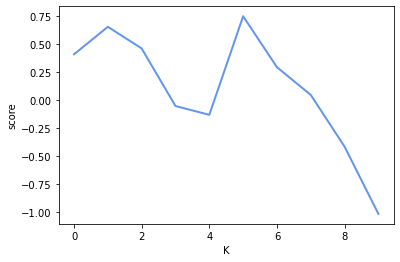

In [ ]:
# Use the bosting diabetes dataset to achieve the following task
# You are welcome to visit all the examples in the given references
# https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py
# One in above is a close example

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

# Achieve following task

regr_1 = DecisionTreeRegressor(max_depth=1)
regr_2 = DecisionTreeRegressor(max_depth=2)
regr_3 = DecisionTreeRegressor(max_depth=5)
regr_4 = DecisionTreeRegressor(max_depth=100)

regr_1.fit(regXtrain, regYtrain)
regr_2.fit(regXtrain, regYtrain)
regr_3.fit(regXtrain, regYtrain)
regr_4.fit(regXtrain, regYtrain)


# Predict

y_1 = regr_1.predict(regXtest)
y_2 = regr_2.predict(regXtest)
y_3 = regr_3.predict(regXtest)
y_4 = regr_4.predict(regXtest)

# Plot the results
x = range(len(regXtest))
plt.figure()
plt.scatter(x, regYtest)
plt.plot(x, y_1, color="cornflowerblue",
         label="max_depth=1", linewidth=2)
plt.plot(x, y_2, color= "yellowgreen", label= "max_depth=2", linewidth=2)
plt.plot(x, y_3, color= "firebrick",
         label="max_depth=5", linewidth=2)
plt.plot(x, y_4, color = "darkorange", label="max_depth=100", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Finally pick the best max_depth you got(you should know how to get the score)
# Use this max_depth, and use cross_val_score and fit your model with k = 10 fold size
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# Plot scores in y axis and k in x axis
# Calculate average scores in kfold

#regr_1score
score = regr_1.score(regXtest, regYtest)
score
print(score)

#regr_2score
score2 = regr_2.score(regXtest, regYtest)
print(score2)

#regr_3score
score3 = regr_3.score(regXtest, regYtest)
print(score3)

#regr1 score
score4 = regr_4.score(regXtest, regYtest)
print(score4)



cvs = cross_val_score(regr_2, regXtest, regYtest, cv=10)
print(cvs)

# # Plot the results
# x = range(len(regXtest))

fig, ax = plt.subplots()
plt.plot(cvs, color="cornflowerblue",
         label="max_depth=1", linewidth=2)
ax.set_xlabel('K')
ax.set_ylabel('score')
plt.show()
# Use cross_val_score and fit your model with k = 10 fold size
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# Plot scores in y axis and k in x axis
# Calculate average scores in kfold


***EXERCISE NO. 1***

  > **Task-2 :Classification | Score :12.5** 

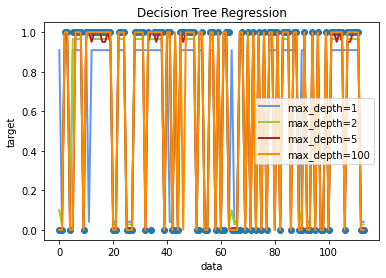

0.5387752819396989
0.7564668777442781
0.7067358029361127
0.6668831168831169
[ 0.96938776 -0.14289114  0.99181574  0.3494898   0.63333333  0.21292541
  0.93586006  0.60714286  0.99090999  0.49074074]


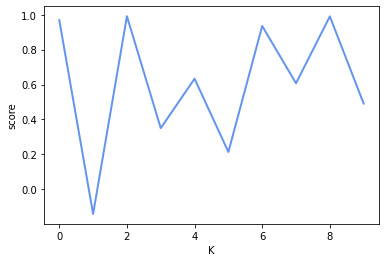

In [ ]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py
# Perform similar experiment like above in breast_cancer data

# Achieve following task

# Create a decision tree regressor model, use max_depth size = 1,2,5,100
# Fit model. You will have 4 different models for different depth sizes
# Plot a similar plot as in the link given above
# Describe your plot

#Fit

cregr_1 = DecisionTreeRegressor(max_depth=1)
cregr_2 = DecisionTreeRegressor(max_depth=2)
cregr_3 = DecisionTreeRegressor(max_depth=5)
cregr_4 = DecisionTreeRegressor(max_depth=100)

cregr_1.fit(clsXtrain, clsYtrain)
cregr_2.fit(clsXtrain, clsYtrain)
cregr_3.fit(clsXtrain, clsYtrain)
cregr_4.fit(clsXtrain, clsYtrain)


# Predict

cy_1 = cregr_1.predict(clsXtest)
cy_2 = cregr_2.predict(clsXtest)
cy_3 = cregr_3.predict(clsXtest)
cy_4 = cregr_4.predict(clsXtest)

# Plot the results
cx = range(len(clsXtest))
plt.figure()
plt.scatter(cx, clsYtest)
plt.plot(cx, cy_1, color="cornflowerblue",
         label="max_depth=1", linewidth=2)
plt.plot(cx, cy_2, color= "yellowgreen", label= "max_depth=2", linewidth=2)
plt.plot(cx, cy_3, color= "firebrick",
         label="max_depth=5", linewidth=2)
plt.plot(cx, cy_4, color = "darkorange", label="max_depth=100", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Finally pick the best max_depth you got(you should know how to get the score)
# Use this max_depth, and use cross_val_score and fit your model with k = 10 fold size
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# Plot scores in y axis and k in x axis
# Calculate average scores in kfold

#regr_1score
score = cregr_1.score(clsXtest, clsYtest)
score
print(score)

#regr_2score
score2 = cregr_2.score(clsXtest, clsYtest)
print(score2)

#regr_3score
score3 = cregr_3.score(clsXtest, clsYtest)
print(score3)

#regr1 score
score4 = cregr_4.score(clsXtest, clsYtest)
print(score4)



ccvs = cross_val_score(cregr_2, clsXtest, clsYtest, cv=10)
print(ccvs)

# # Plot the results
# x = range(len(regXtest))

fig, ax = plt.subplots()
plt.plot(ccvs, color="cornflowerblue",
         label="max_depth=1", linewidth=2)
ax.set_xlabel('K')
ax.set_ylabel('score')
plt.show()








### 2. Decision Tree with bagging
---



---



***EXERCISE NO. 2***

  > **Task-1 : Regression | Score :12.5** 

In [ ]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html#sphx-glr-auto-examples-ensemble-plot-bias-variance-py

# Perform similar experiment like above for diabetes dataset




import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Settings
n_repeat = 50       # Number of iterations for computing expectations
n_train = 50        # Size of the training set
n_test = 1000       # Size of the test set
noise = 0.1         # Standard deviation of the noise
np.random.seed(0)

# Change this for exploring the bias-variance decomposition of other
# estimators. This should work well for estimators with high variance (e.g.,
# decision trees or KNN), but poorly for estimators with low variance (e.g.,
# linear models).
estimators = [("Tree", DecisionTreeRegressor()),
              ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor()))]

n_estimators = len(estimators)


# # Generate data
# def f(x):
#     x = x.ravel()

#     return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)


# def generate(n_samples, noise, n_repeat=1):
#     X = np.random.rand(n_samples) * 10 - 5
#     X = np.sort(X)

#     if n_repeat == 1:
#         y = f(X) + np.random.normal(0.0, noise, n_samples)
#     else:
#         y = np.zeros((n_samples, n_repeat))

#         for i in range(n_repeat):
#             y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

#     X = X.reshape((n_samples, 1))

#     return X, y




plt.figure(figsize=(10, 8))

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        estimator.fit(regXtrain, regYtrain)
        y_predict = estimator.predict(regXtest)
        # Bias^2 + Variance + Noise decomposition of the mean squared error
        y_error = np.zeros(n_test)
        
        for i in range(n_repeat):
          for j in range(n_repeat):
            y_error = (regYtest - y_predict) ** 2
            y_error /= (n_repeat * n_repeat)
            y_noise = np.var(y_test, axis=1)
            y_bias = (regXtest) - np.mean(y_predict, axis=1)) ** 2
            y_var = np.var(y_predict, axis=1)
            print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
            " + {3:.4f} (var) + {4:.4f} (noise)".format(name,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))
            # Plot figure
            plt.subplot(2, n_estimators, n + 1)
            plt.plot(regXtest, f(X_test), "b", label="$f(x)$")
            plt.plot(regXtest[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")
            for i in range(n_repeat):
               if i == 0:
                 plt.plot(regXtest, y_predict[:, i], "r", label=r"$\^y(x)$")
                 else:
                   plt.plot(regYtest, y_predict[:, i], "r", alpha=0.05)
                   plt.plot(regXtest, np.mean(y_predict, axis=1), "c",
                            label=r"$\mathbb{E}_{LS} \^y(x)$")
                   plt.xlim([-5, 5])
                   plt.title(name)
                   if n == n_estimators - 1:
                     plt.legend(loc=(1.1, .5))
                     plt.subplot(2, n_estimators, n_estimators + n + 1)
                     plt.plot(regXtest, y_error, "r", label="$error(x)$")
                     plt.plot(regXtest, y_bias, "b", label="$bias^2(x)$"),
                     plt.plot(regXtest, y_var, "g", label="$variance(x)$"),
                     plt.plot(regXtest, y_noise, "c", label="$noise(x)$")
                     plt.xlim([-5, 5])
                     plt.ylim([0, 0.1])
                     if n == n_estimators - 1:
                       plt.legend(loc=(1.1, .5))
                       plt.subplots_adjust(right=.75)
                       plt.show()

"Sorry had a hard time figuring the exact changes to make on this example"
# Explain your data visualization
"Should show the error, bias, noise,variance and error of tree and bagging tree"
"The bagging tree should be an improved plot of the tree"
# Compare this bagging approach with kfold cross validation approach we did in 1.1
"Bagging tree perform better and is better for visualization"

SyntaxError: ignored

***EXERCISE NO. 2***

  > **Task-2 :Classification | Score :12.5** 

ValueError: ignored

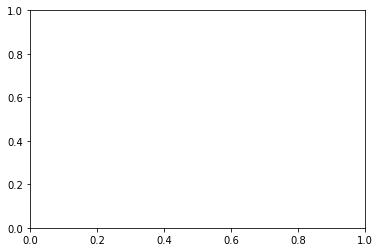

In [ ]:
# Study how bagging classifier is used from below
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
# Now use visualization as you did in exerciseno1. task2

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier

# ds = DecisionTreeClassifier(criterion='entropy',max_depth=None)
# bag = BaggingClassifier(max_samples=1.0,bootstrap=True)
# bag.fit(X_train, y_train)


clf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0).fit(regX, regy)


# # Plot the results
x = range(len(regXtest))

# fig, ax = plt.subplots()
plt.plot(10,clf, color="cornflowerblue",
         label="max_depth=1", linewidth=2)
ax.set_xlabel('K')
ax.set_ylabel('score')
plt.show()
# Explain your visualization
"Bagging should work to increase the variance of the model and to improve error but could not get graph to work properly"
# Compare this approach wtih kfold cross validation approach we did in 1.2
"bagging should be an improvement over the k-fold approach and give less variance"

### 3. Random Forest
---



---



***EXERCISE NO. 3***

  > **Task-1 : Regression | Score :12.5** 

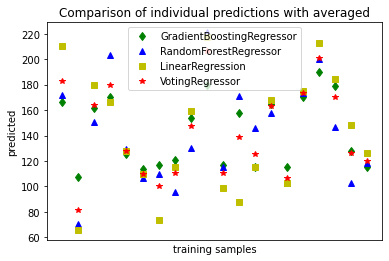

'overfitting'

In [ ]:
# Study following example 
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py
# Do similar experiment on diabetes data
# Now explain your visualization



from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor


regx, regy = load_diabetes(return_X_y=True)
regX = preprocessing.scale(regx)
regXtrain, regXtest, regYtrain, regYtest = train_test_split(regX, regy, test_size = 0.2)

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])


reg1.fit(regXtrain, regYtrain)
reg2.fit(regXtrain, regYtrain)
reg3.fit(regXtrain, regYtrain)
ereg.fit(regXtrain, regYtrain)

xt = regX[:20]

plt.figure()
plt.plot(reg1.predict(xt), 'gd', label='GradientBoostingRegressor')
plt.plot(reg2.predict(xt), 'b^', label='RandomForestRegressor')
plt.plot(reg3.predict(xt), 'ys', label='LinearRegression')
plt.plot(ereg.predict(xt), 'r*', label='VotingRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()
# How do you compare random forest regression with decision tree regression?
"random forest regression combines multiple decison trees regressions into a an aggregated result to allow for less"
"overfitting"


***EXERCISE NO. 3***

  > **Task-2 :Classification | Score :12.5** 

DecisionTree with features [0, 1] has a score of 1.0
RandomForest with 30 estimators with features [0, 1] has a score of 0.9982425307557118
ExtraTrees with 30 estimators with features [0, 1] has a score of 1.0
AdaBoost with 30 estimators with features [0, 1] has a score of 1.0
DecisionTree with features [0, 2] has a score of 1.0
RandomForest with 30 estimators with features [0, 2] has a score of 0.9982425307557118
ExtraTrees with 30 estimators with features [0, 2] has a score of 1.0
AdaBoost with 30 estimators with features [0, 2] has a score of 1.0
DecisionTree with features [2, 3] has a score of 1.0
RandomForest with 30 estimators with features [2, 3] has a score of 1.0
ExtraTrees with 30 estimators with features [2, 3] has a score of 1.0
AdaBoost with 30 estimators with features [2, 3] has a score of 1.0


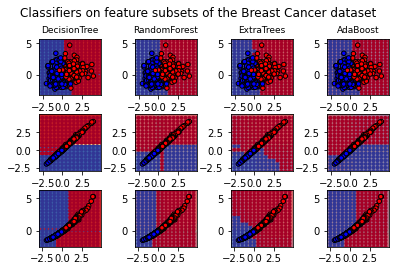

'These classifiers are all very near a score of 1'

In [ ]:
# Study following example
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html#sphx-glr-auto-examples-ensemble-plot-forest-iris-py
# Reproduce above experiment for breast_cancer data

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier



# clsx, clsy = load_breast_cancer(return_X_y=True)
# clsX = preprocessing.scale(clsx)
# clsXtrain, clsXtest, clsYtrain, clsYtest = train_test_split(clsX, clsy, test_size = 0.2)
# print(f"Classification data : breast cancer data")
# print(f"xtrainShape : {clsXtrain.shape}, ytrainShape : {clsYtrain.shape}, xtestShape : {clsXtest.shape}, ytestShape : {clsYtest.shape}, NumClasses = {np.unique(clsy)}")

# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1

models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # We only take the two corresponding features
        X = clsX[:, pair]
        y = clsy

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        model.fit(X, y)

        scores = model.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(
            ".")[-1][:-2][:-len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
              "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=9)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                         yy_coarser.ravel()]
                                         ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolor='k', s=20)
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Breast Cancer dataset", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()


# Explain your visualization.
"Graphs of the different feature subsets of the breast cancer dataset"
"Shows the results of the decison tree, random forest,extra trees, and adaboost"
"These classifiers are all very near a score of 1"
# How do you compare this approach with decision tree based approach?

#Regression trees are used when dependent variable is continuous. Classification Trees are used when dependent variable is categorical.
# Regression tree make its prediction with mean value.
# Classification Tree makes its prediction with mode value.
# Both the trees divide the predictor space (independent variables) into distinct and non-overlapping regions.

### 4. Boosting with Gradient Boosting
---



---



***EXERCISE NO. 4***

  > **Task-1 : Regression | Score :12.5** 

MSE: 3278.1229


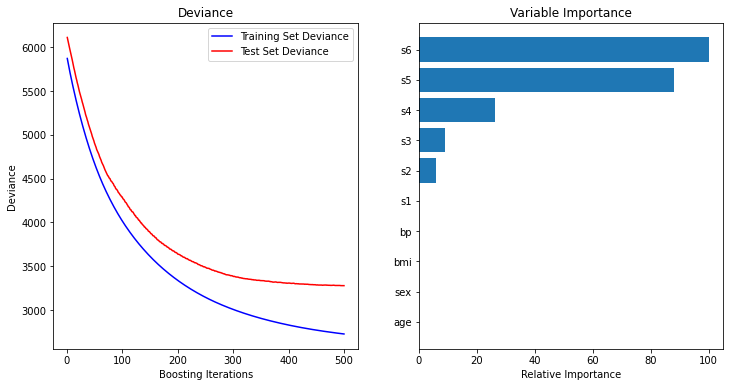

MSE: 3574.5087


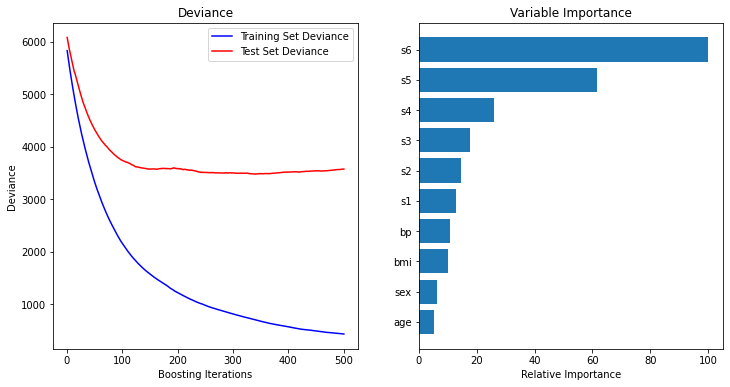

MSE: 5676.5226


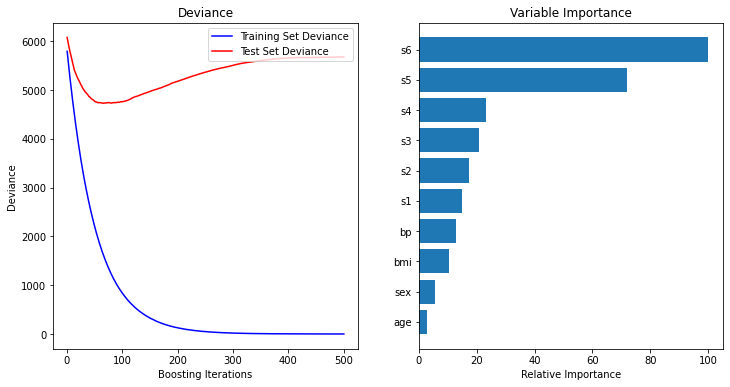

MSE: 6228.7554


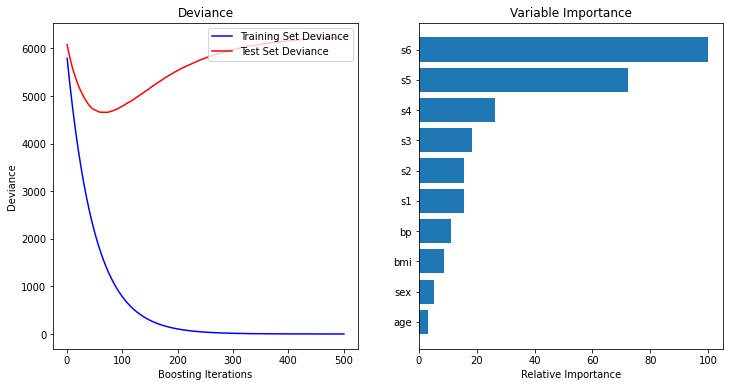

'greater depth on test set increases deviance'

In [ ]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py
# Study above example
# Try to reproduce this experiment with diabetes data

# Create similar visualization for max_depth = 1,5,10,100
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Load data
# regx, regy = load_diabetes(return_X_y=True)
# regX = preprocessing.scale(regx)
# regXtrain, regXtest, regYtrain, regYtest = train_test_split(regX, regy, test_size = 0.2)
diabetes = load_diabetes()
X, y = shuffle(regX, regy, random_state = 13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 1, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,  diabetes.feature_names)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,  diabetes.feature_names)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()




# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,  diabetes.feature_names)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 100, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,  diabetes.feature_names)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
# Explain visualization.
"Demonstrates Gradient Boosting with the diabetes dataset"

"This fits a Gradient Boosting model with least squares loss and regression trees 1, 5, 10, 100"
"Graph of deviance is on the left and variable importance on the right"
"training set deviance grows less with the increase of boosting iterations as seen on the graph"
"variable importance is show on the right with age as the least important varibale and s6 as the most"
"greater depth on test set increases deviance"

# How does boosting help your regressor model??
# Gradient Boosting sequentially adds predictors to an ensemble, each one
#  correcting its predecessor but instead of changing the weights for every 
#  incorrect classified observation at every iteration like AdaBoost, Gradient 
#  boosting method tries to fit the new predictor to the residual errors made 
#  by the previous predictor.


***EXERCISE NO. 4***

  > **Task-2 :Classification | Score :12.5** 

Accuracy: 0.9737


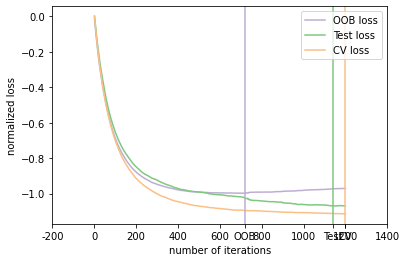

Accuracy: 0.9649


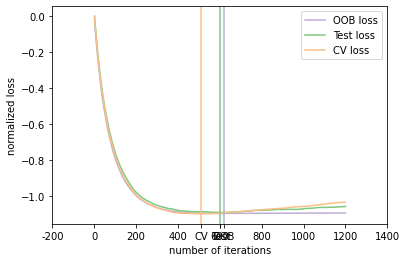

Accuracy: 0.9561


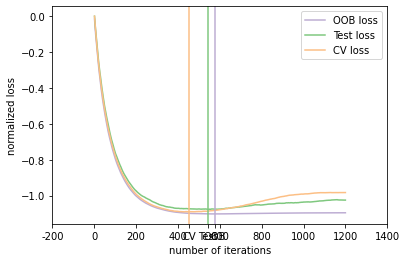

Accuracy: 0.9561


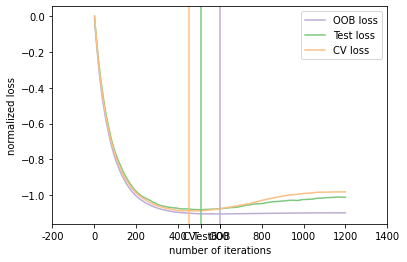

Accuracy: 0.9561


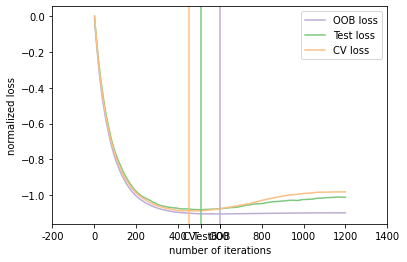

'it appaears that a max depth of greater than 10 has little effect on the model '

In [ ]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_oob.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-oob-py
# Study above example
# Try to reproduce this experiment with cancer data

# Create similar visualization for max_depth = 1,5,10,100,1000


import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from scipy.special import expit

# # Generate data (adapted from G. Ridgeway's gbm example)
# n_samples = 1000
# random_state = np.random.RandomState(13)
# x1 = random_state.uniform(size=n_samples)
# x2 = random_state.uniform(size=n_samples)
# x3 = random_state.randint(0, 4, size=n_samples)

# p = expit(np.sin(3 * x1) - 4 * x2 + x3)
# y = random_state.binomial(1, p, size=n_samples)

# X = np.c_[x1, x2, x3]state

# X = X.astype(np.float32)

clsx, clsy = load_breast_cancer(return_X_y=True)
clsX = preprocessing.scale(clsx)
X_train, X_test, y_train, y_test  = train_test_split(clsX, clsy, test_size = 0.2,random_state=9)


# Fit classifier with out-of-bag estimates
params = {'n_estimators': 1200, 'max_depth': 1, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("Accuracy: {:.4f}".format(acc))

n_estimators = params['n_estimators']
x = np.arange(n_estimators) + 1


def heldout_score(clf, X_test, y_test):
    """compute deviance scores on ``X_test`` and ``y_test``. """
    score = np.zeros((n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        score[i] = clf.loss_(y_test, y_pred)
    return score


def cv_estimate(n_splits=None):
    cv = KFold(n_splits=n_splits)
    cv_clf = ensemble.GradientBoostingClassifier(**params)
    val_scores = np.zeros((n_estimators,), dtype=np.float64)
    for train, test in cv.split(X_train, y_train):
        cv_clf.fit(X_train[train], y_train[train])
        val_scores += heldout_score(cv_clf, X_train[test], y_train[test])
    val_scores /= n_splits
    return val_scores


# Estimate best n_estimator using cross-validation
cv_score = cv_estimate(3)

# Compute best n_estimator for test data
test_score = heldout_score(clf, X_test, y_test)

# negative cumulative sum of oob improvements
cumsum = -np.cumsum(clf.oob_improvement_)

# min loss according to OOB
oob_best_iter = x[np.argmin(cumsum)]

# min loss according to test (normalize such that first loss is 0)
test_score -= test_score[0]
test_best_iter = x[np.argmin(test_score)]

# min loss according to cv (normalize such that first loss is 0)
cv_score -= cv_score[0]
cv_best_iter = x[np.argmin(cv_score)]

# color brew for the three curves
oob_color = list(map(lambda x: x / 256.0, (190, 174, 212)))
test_color = list(map(lambda x: x / 256.0, (127, 201, 127)))
cv_color = list(map(lambda x: x / 256.0, (253, 192, 134)))

# plot curves and vertical lines for best iterations
plt.plot(x, cumsum, label='OOB loss', color=oob_color)
plt.plot(x, test_score, label='Test loss', color=test_color)
plt.plot(x, cv_score, label='CV loss', color=cv_color)
plt.axvline(x=oob_best_iter, color=oob_color)
plt.axvline(x=test_best_iter, color=test_color)
plt.axvline(x=cv_best_iter, color=cv_color)

# add three vertical lines to xticks
xticks = plt.xticks()
xticks_pos = np.array(xticks[0].tolist() +
                      [oob_best_iter, cv_best_iter, test_best_iter])
xticks_label = np.array(list(map(lambda t: int(t), xticks[0])) +
                        ['OOB', 'CV', 'Test'])
ind = np.argsort(xticks_pos)
xticks_pos = xticks_pos[ind]
xticks_label = xticks_label[ind]
plt.xticks(xticks_pos, xticks_label)

plt.legend(loc='upper right')
plt.ylabel('normalized loss')
plt.xlabel('number of iterations')

plt.show()


# Fit classifier with out-of-bag estimates
params = {'n_estimators': 1200, 'max_depth':5, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("Accuracy: {:.4f}".format(acc))

n_estimators = params['n_estimators']
x = np.arange(n_estimators) + 1

# Estimate best n_estimator using cross-validation
cv_score = cv_estimate(3)

# Compute best n_estimator for test data
test_score = heldout_score(clf, X_test, y_test)

# negative cumulative sum of oob improvements
cumsum = -np.cumsum(clf.oob_improvement_)

# min loss according to OOB
oob_best_iter = x[np.argmin(cumsum)]

# min loss according to test (normalize such that first loss is 0)
test_score -= test_score[0]
test_best_iter = x[np.argmin(test_score)]

# min loss according to cv (normalize such that first loss is 0)
cv_score -= cv_score[0]
cv_best_iter = x[np.argmin(cv_score)]

# color brew for the three curves
oob_color = list(map(lambda x: x / 256.0, (190, 174, 212)))
test_color = list(map(lambda x: x / 256.0, (127, 201, 127)))
cv_color = list(map(lambda x: x / 256.0, (253, 192, 134)))

# plot curves and vertical lines for best iterations
plt.plot(x, cumsum, label='OOB loss', color=oob_color)
plt.plot(x, test_score, label='Test loss', color=test_color)
plt.plot(x, cv_score, label='CV loss', color=cv_color)
plt.axvline(x=oob_best_iter, color=oob_color)
plt.axvline(x=test_best_iter, color=test_color)
plt.axvline(x=cv_best_iter, color=cv_color)

# add three vertical lines to xticks
xticks = plt.xticks()
xticks_pos = np.array(xticks[0].tolist() +
                      [oob_best_iter, cv_best_iter, test_best_iter])
xticks_label = np.array(list(map(lambda t: int(t), xticks[0])) +
                        ['OOB', 'CV', 'Test'])
ind = np.argsort(xticks_pos)
xticks_pos = xticks_pos[ind]
xticks_label = xticks_label[ind]
plt.xticks(xticks_pos, xticks_label)

plt.legend(loc='upper right')
plt.ylabel('normalized loss')
plt.xlabel('number of iterations')

plt.show()



params = {'n_estimators': 1200, 'max_depth':10, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("Accuracy: {:.4f}".format(acc))

n_estimators = params['n_estimators']
x = np.arange(n_estimators) + 1

# Estimate best n_estimator using cross-validation
cv_score = cv_estimate(3)

# Compute best n_estimator for test data
test_score = heldout_score(clf, X_test, y_test)

# negative cumulative sum of oob improvements
cumsum = -np.cumsum(clf.oob_improvement_)

# min loss according to OOB
oob_best_iter = x[np.argmin(cumsum)]

# min loss according to test (normalize such that first loss is 0)
test_score -= test_score[0]
test_best_iter = x[np.argmin(test_score)]

# min loss according to cv (normalize such that first loss is 0)
cv_score -= cv_score[0]
cv_best_iter = x[np.argmin(cv_score)]

# color brew for the three curves
oob_color = list(map(lambda x: x / 256.0, (190, 174, 212)))
test_color = list(map(lambda x: x / 256.0, (127, 201, 127)))
cv_color = list(map(lambda x: x / 256.0, (253, 192, 134)))

# plot curves and vertical lines for best iterations
plt.plot(x, cumsum, label='OOB loss', color=oob_color)
plt.plot(x, test_score, label='Test loss', color=test_color)
plt.plot(x, cv_score, label='CV loss', color=cv_color)
plt.axvline(x=oob_best_iter, color=oob_color)
plt.axvline(x=test_best_iter, color=test_color)
plt.axvline(x=cv_best_iter, color=cv_color)

# add three vertical lines to xticks
xticks = plt.xticks()
xticks_pos = np.array(xticks[0].tolist() +
                      [oob_best_iter, cv_best_iter, test_best_iter])
xticks_label = np.array(list(map(lambda t: int(t), xticks[0])) +
                        ['OOB', 'CV', 'Test'])
ind = np.argsort(xticks_pos)
xticks_pos = xticks_pos[ind]
xticks_label = xticks_label[ind]
plt.xticks(xticks_pos, xticks_label)

plt.legend(loc='upper right')
plt.ylabel('normalized loss')
plt.xlabel('number of iterations')

plt.show()


##max_depth100

params = {'n_estimators': 1200, 'max_depth':100, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("Accuracy: {:.4f}".format(acc))

n_estimators = params['n_estimators']
x = np.arange(n_estimators) + 1

# Estimate best n_estimator using cross-validation
cv_score = cv_estimate(3)

# Compute best n_estimator for test data
test_score = heldout_score(clf, X_test, y_test)

# negative cumulative sum of oob improvements
cumsum = -np.cumsum(clf.oob_improvement_)

# min loss according to OOB
oob_best_iter = x[np.argmin(cumsum)]

# min loss according to test (normalize such that first loss is 0)
test_score -= test_score[0]
test_best_iter = x[np.argmin(test_score)]

# min loss according to cv (normalize such that first loss is 0)
cv_score -= cv_score[0]
cv_best_iter = x[np.argmin(cv_score)]

# color brew for the three curves
oob_color = list(map(lambda x: x / 256.0, (190, 174, 212)))
test_color = list(map(lambda x: x / 256.0, (127, 201, 127)))
cv_color = list(map(lambda x: x / 256.0, (253, 192, 134)))

# plot curves and vertical lines for best iterations
plt.plot(x, cumsum, label='OOB loss', color=oob_color)
plt.plot(x, test_score, label='Test loss', color=test_color)
plt.plot(x, cv_score, label='CV loss', color=cv_color)
plt.axvline(x=oob_best_iter, color=oob_color)
plt.axvline(x=test_best_iter, color=test_color)
plt.axvline(x=cv_best_iter, color=cv_color)

# add three vertical lines to xticks
xticks = plt.xticks()
xticks_pos = np.array(xticks[0].tolist() +
                      [oob_best_iter, cv_best_iter, test_best_iter])
xticks_label = np.array(list(map(lambda t: int(t), xticks[0])) +
                        ['OOB', 'CV', 'Test'])
ind = np.argsort(xticks_pos)
xticks_pos = xticks_pos[ind]
xticks_label = xticks_label[ind]
plt.xticks(xticks_pos, xticks_label)

plt.legend(loc='upper right')
plt.ylabel('normalized loss')
plt.xlabel('number of iterations')

plt.show()


params = {'n_estimators': 1200, 'max_depth':1000, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("Accuracy: {:.4f}".format(acc))

n_estimators = params['n_estimators']
x = np.arange(n_estimators) + 1

# Estimate best n_estimator using cross-validation
cv_score = cv_estimate(3)

# Compute best n_estimator for test data
test_score = heldout_score(clf, X_test, y_test)

# negative cumulative sum of oob improvements
cumsum = -np.cumsum(clf.oob_improvement_)

# min loss according to OOB
oob_best_iter = x[np.argmin(cumsum)]

# min loss according to test (normalize such that first loss is 0)
test_score -= test_score[0]
test_best_iter = x[np.argmin(test_score)]

# min loss according to cv (normalize such that first loss is 0)
cv_score -= cv_score[0]
cv_best_iter = x[np.argmin(cv_score)]

# color brew for the three curves
oob_color = list(map(lambda x: x / 256.0, (190, 174, 212)))
test_color = list(map(lambda x: x / 256.0, (127, 201, 127)))
cv_color = list(map(lambda x: x / 256.0, (253, 192, 134)))

# plot curves and vertical lines for best iterations
plt.plot(x, cumsum, label='OOB loss', color=oob_color)
plt.plot(x, test_score, label='Test loss', color=test_color)
plt.plot(x, cv_score, label='CV loss', color=cv_color)
plt.axvline(x=oob_best_iter, color=oob_color)
plt.axvline(x=test_best_iter, color=test_color)
plt.axvline(x=cv_best_iter, color=cv_color)

# add three vertical lines to xticks
xticks = plt.xticks()
xticks_pos = np.array(xticks[0].tolist() +
                      [oob_best_iter, cv_best_iter, test_best_iter])
xticks_label = np.array(list(map(lambda t: int(t), xticks[0])) +
                        ['OOB', 'CV', 'Test'])
ind = np.argsort(xticks_pos)
xticks_pos = xticks_pos[ind]
xticks_label = xticks_label[ind]
plt.xticks(xticks_pos, xticks_label)

plt.legend(loc='upper right')
plt.ylabel('normalized loss')
plt.xlabel('number of iterations')

plt.show()
# Explain your visualization.
"Shows a gradient boosting out of bag estimate of max depth 1,5,10,100,1000"

# How does boosting help your classification model??
"Boosting created similar results to the cross validation example from earlier"
"it appaears that a max depth of greater than 10 has little effect on the model "
